In [34]:
# Python code written for Medium publication - MCD - UNISON (Dec, 2023).
# By: Viowi Y. Cabrisas Amuedo.

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [35]:
# Generate example data
np.random.seed(3383)
y_true = np.random.randint(5, size=100)  # Real classes
y_pred = np.random.randint(5, size=100)  # Classes predicted by the model

classif = [1, 2, 3, 4, 5]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3 5 4 3 7]
 [5 4 4 7 5]
 [3 2 4 6 4]
 [8 1 1 4 3]
 [4 6 2 1 4]]


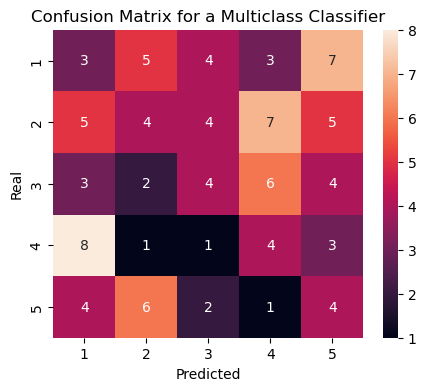

In [36]:
# Graphing the Confusion Matrix...
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = classif, 
                     columns = classif)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('Confusion Matrix for a Multiclass Classifier')
plt.ylabel('Real')
plt.xlabel('Predicted')
plt.show()

In [37]:
"""
Parameters that make up the confusion matrix:
tp -> True Positives.
tn -> True Negatives.
fp -> False Positives.
fn -> False Negatives.

# Metrics:
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
f1score = (2 * precision * sensitivity) / (precision + sensitivity)

# Multiply by 100 and round...
"""

classes = len(classif)
metrics_by_classes = {}

def metrics(tp, tn, fp, fn):
    precision = round((tp / (tp + fp)) * 100, 2) if tp != 0 and fp != 0 else 0.0
    accuracy = round(((tp + tn) / (tp + tn + fp + fn)) * 100, 2) if tp != 0 and fp != 0 and tn != 0 and fn != 0 else 0.0
    specificity = round((tn / (tn + fp)) * 100, 2) if tn != 0 and fp != 0 else 0.0
    sensitivity = round((tp / (tp + fn)) * 100, 2) if tp != 0 and fn != 0 else 0.0
    f1score = round(((2 * precision * sensitivity) / (precision + sensitivity)), 2) if precision != 0 and sensitivity != 0 else 0.0
    return [precision, accuracy, specificity, sensitivity, f1score]

# Calculation of metrics for each class:
for k in range(classes):
    #key = str(quality[k])
    key = classif[k]
    tp, fp, tn, fn = 0, 0, 0, 0
    tp = conf_matrix[k, k]
    for i in range(classes):
        for j in range(classes):
            if i != k and j != k:
                tn += conf_matrix[i, j]
            if i == k and j != k:
                fn += conf_matrix[i, j]
            if i != k and j == k:
                fp += conf_matrix[i, j]
    metrics_by_classes[key] = metrics(tp, tn, fp, fn)

metrics_list = ["Precision", "Accuracy", "Specificity", "Sensitivity", "F1 Score"]

metrics_classes_df = pd.DataFrame(metrics_by_classes, index=metrics_list)
metrics_classes_df = metrics_classes_df.transpose().sort_index()

# Calculating the averages of the metrics for each class
averages = [round(metrics_classes_df[column].mean(), 2) for column in metrics_classes_df.columns]
averages_df = pd.DataFrame({"Average": averages}, index=metrics_list)
averages_df = averages_df.transpose()

final_metrics_df = pd.concat([metrics_classes_df, averages_df])
final_metrics_df

,Precision,Accuracy,Specificity,Sensitivity,F1 Score
1,13.04,61.0,74.36,13.64,13.33
2,22.22,65.0,81.33,16.00,18.60
3,26.67,74.0,86.42,21.05,23.53
4,19.05,70.0,79.52,23.53,21.05
5,17.39,68.0,77.11,23.53,20.00
Average,19.67,67.6,79.75,19.55,19.30
